<a href="https://colab.research.google.com/github/arctron/learn-pytorch/blob/main/Regression_In_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References
- https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
import torch
from torch import nn
torch.__version__

'2.0.1+cu118'

In [ ]:
# Linear Regression
x = torch.arange(1, 10, 1).type(torch.float)
print(x.shape, x.device, x.dtype)
m = 0.5
c = 3
y = m * x + c

split = int(0.8 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]
x_train = x_train.unsqueeze(0)
y_train = y_train.unsqueeze(0)
x_test = x_test.unsqueeze(0)
y_test = y_test.unsqueeze(0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


# Random initlization of parameters
w = torch.rand((1, 1), requires_grad = True)
b = torch.rand((1, 1), requires_grad = True)

print('----------------')

print('w is', w, w.shape)
print('b is', b, b.shape)

print('------ x train is ------')
print(x_train)

print('------ y train is ------')
print(y_train)

# Gradient Descent
for i in range(500):
  # Forward pass
  o = w @ x_train + b
  # print('o is ')
  # print(o)

  # Loss
  loss = ((o - y_train) ** 2).sum()
  # print('loss is')
  # print(o - y_train)
  # print((o - y_train) ** 2)
  # print('***** Loss value is : ***** = ', loss)

  # Zero out gradients
  w.grad = None
  b.grad = None

  # Backprop
  loss.backward()

  # print(f'{w.grad=}, {b.grad=}')
  w.data -= 0.005 * w.grad
  b.data -= 0.005 * b.grad


print(w, b)

torch.Size([9]) cpu torch.float32
torch.Size([1, 7]) torch.Size([1, 7])
torch.Size([1, 2]) torch.Size([1, 2])
----------------
w is tensor([[0.6449]], requires_grad=True) torch.Size([1, 1])
b is tensor([[0.5739]], requires_grad=True) torch.Size([1, 1])
------ x train is ------
tensor([[1., 2., 3., 4., 5., 6., 7.]])
------ y train is ------
tensor([[3.5000, 4.0000, 4.5000, 5.0000, 5.5000, 6.0000, 6.5000]])
tensor([[0.5005]], requires_grad=True) tensor([[2.9973]], requires_grad=True)


In [ ]:
class LR(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))
    self.bias = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42)

model = LR()
print(list(model.parameters()))
print(model.state_dict())

loss_fn = nn.L1Loss() # MAE

optim = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, 'min')

for i in range(1000):
  model.train()
  y_pred = model(x_train)
  loss = loss_fn(y_pred, y_train)
  optim.zero_grad()
  loss.backward()
  optim.step()
  scheduler.step(loss)
  if i % 50 == 0:
    print(i, loss, model.state_dict())

print('Final:', loss, model.state_dict())

[Parameter containing:
tensor([0.8823], requires_grad=True), Parameter containing:
tensor([0.9150], requires_grad=True)]
OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])
0 tensor(0.7843, grad_fn=<MeanBackward0>) OrderedDict([('weights', tensor([0.8851])), ('bias', tensor([0.9193]))])
50 tensor(0.7082, grad_fn=<MeanBackward0>) OrderedDict([('weights', tensor([0.8708])), ('bias', tensor([1.1021]))])
100 tensor(0.6411, grad_fn=<MeanBackward0>) OrderedDict([('weights', tensor([0.8423])), ('bias', tensor([1.2821]))])
150 tensor(0.5756, grad_fn=<MeanBackward0>) OrderedDict([('weights', tensor([0.7994])), ('bias', tensor([1.4593]))])
200 tensor(0.5084, grad_fn=<MeanBackward0>) OrderedDict([('weights', tensor([0.7708])), ('bias', tensor([1.6393]))])
250 tensor(0.4429, grad_fn=<MeanBackward0>) OrderedDict([('weights', tensor([0.7280])), ('bias', tensor([1.8164]))])
300 tensor(0.3758, grad_fn=<MeanBackward0>) OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([1.

In [ ]:
def normalize(x: torch.Tensor) -> torch.Tensor:
  maxv, i = torch.max(x, dim=0, keepdim=True)
  minv, i = torch.min(x, dim=0, keepdim=True)
  return ((x - minv)/(maxv - minv)), maxv, minv

In [ ]:
# Quadratic Regression
a = 3
b = 5
c = 19
x = torch.arange(0, 20, 0.4).unsqueeze(dim=1)
y = a*x*x + b*x + c


split = int(0.8 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]
x_train = torch.stack((x_train.squeeze(1) * x_train.squeeze(1), x_train.squeeze(1)), dim=1)
x_test = torch.stack((x_test.squeeze(1) * x_test.squeeze(1), x_test.squeeze(1)), dim=1)

x_train, max_x_train, min_x_train = normalize(x_train)
y_train, max_y_train, min_y_train = normalize(y_train)
x_test = ((x_test - min_x_train)/(max_x_train - min_x_train))
y_test = ((y_test - min_y_train)/(max_y_train - min_y_train))


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([40, 2]) torch.Size([40, 1])
torch.Size([10, 2]) torch.Size([10, 1])


In [ ]:
class QR(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand((2, 1), dtype=torch.float, requires_grad=True))
    self.bias = nn.Parameter(torch.rand((1, 1), dtype=torch.float, requires_grad=True))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return x @ self.weights + self.bias


In [ ]:
# torch.manual_seed(42)

model = QR()
print(list(model.parameters()))
print(model.state_dict())

loss_fn = nn.L1Loss()

optim = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, 'min')

for i in range(3000):
  model.train()
  y_pred = model(x_train)
  loss = loss_fn(y_pred, y_train)
  optim.zero_grad()
  loss.backward()
  optim.step()
  scheduler.step(loss)

  if i % 100 == 0:
    model.eval()
    with torch.inference_mode():
      test_pred = model(x_test)
      test_loss = loss_fn(test_pred, y_test)
      print(f'{i}: Train Loss: {loss.data}, Test Loss: {test_loss.data}')

print('Final:', loss, model.state_dict())
print(model.state_dict()['weights'])
print(model.state_dict()['bias'])

[Parameter containing:
tensor([[0.5472],
        [0.0062]], requires_grad=True), Parameter containing:
tensor([[0.9516]], requires_grad=True)]
OrderedDict([('weights', tensor([[0.5472],
        [0.0062]])), ('bias', tensor([[0.9516]]))])
0: Train Loss: 0.7860885262489319, Test Loss: 0.3625355064868927
100: Train Loss: 0.18557517230510712, Test Loss: 0.5095734000205994
200: Train Loss: 0.08603464066982269, Test Loss: 0.2631135880947113
300: Train Loss: 0.009158364497125149, Test Loss: 0.0025018095038831234
400: Train Loss: 0.0017788481200113893, Test Loss: 0.008579504676163197
500: Train Loss: 0.0015676359180361032, Test Loss: 0.007017242722213268
600: Train Loss: 0.0013636210933327675, Test Loss: 0.006144237704575062
700: Train Loss: 0.0011612974340096116, Test Loss: 0.005336451344192028
800: Train Loss: 0.0009566668304614723, Test Loss: 0.004255437757819891
900: Train Loss: 0.0007546780980192125, Test Loss: 0.0033823014236986637
1000: Train Loss: 0.0005525198648683727, Test Loss: 0.00

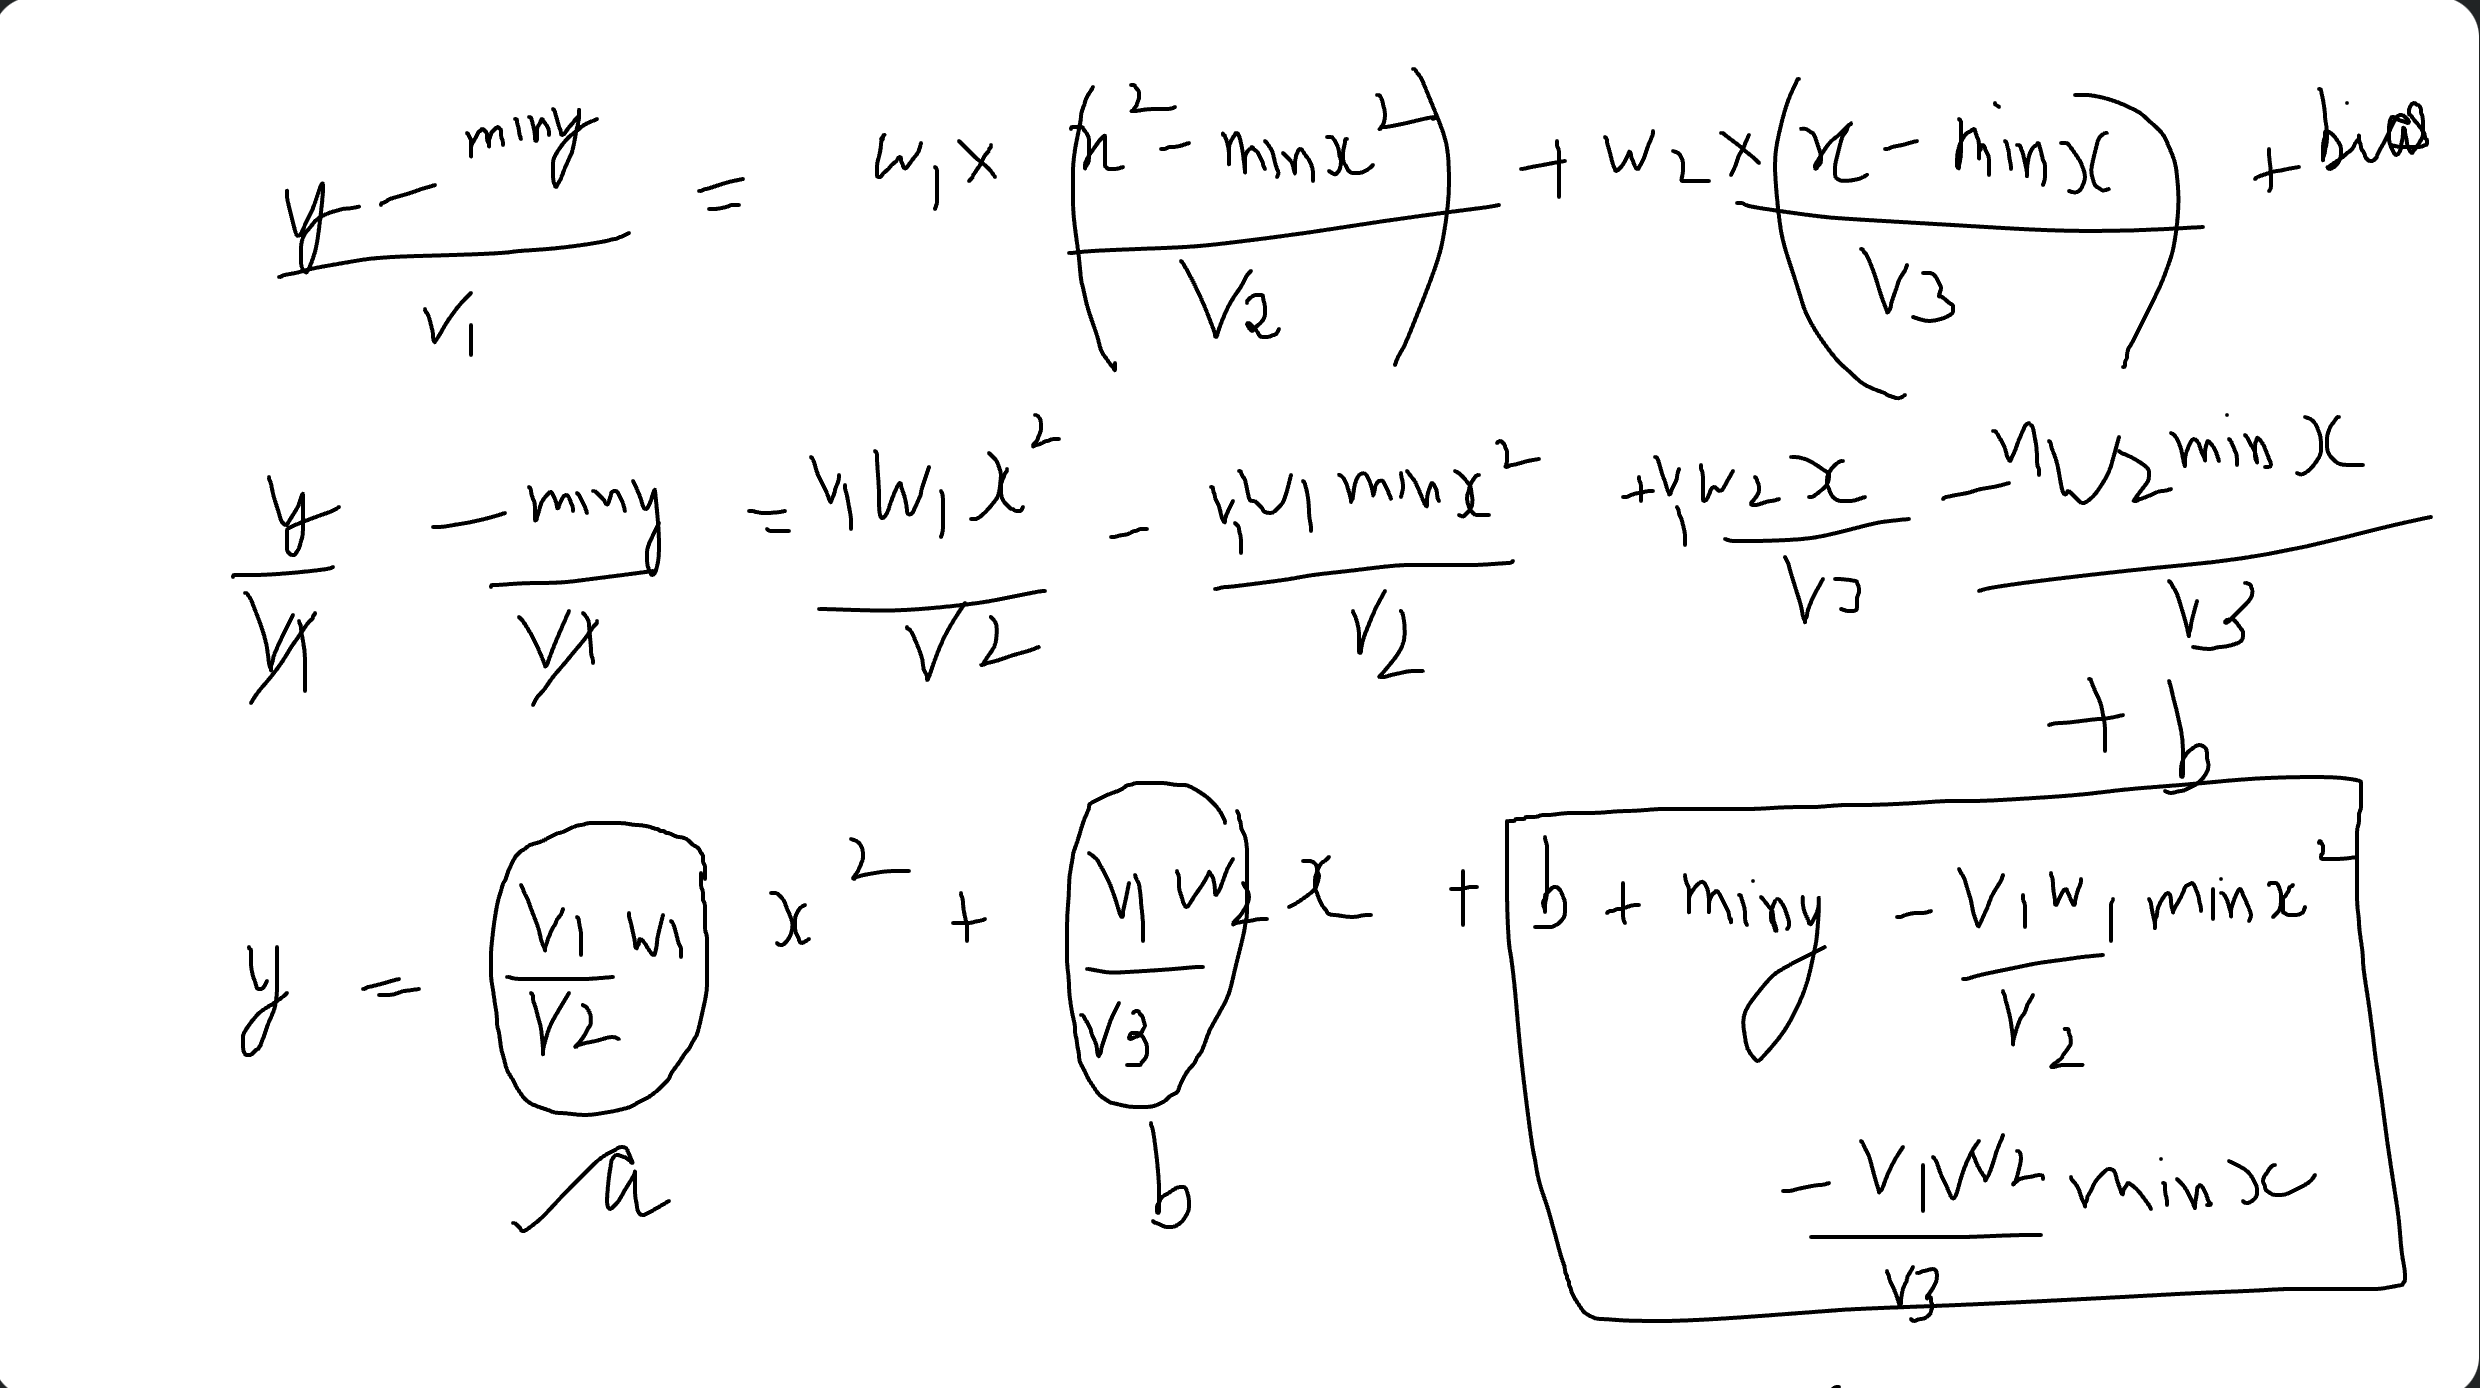

In [ ]:
v1 = (max_y_train - min_y_train).item()
v2 = (max_x_train - min_x_train)[0][0].item()
v3 = (max_x_train - min_x_train)[0][1].item()
w1 = model.state_dict()['weights'][0].item()
w2 = model.state_dict()['weights'][1].item()
bias = model.state_dict()['bias'].item()
minx2 = min_x_train[0][0].item()
minx = min_x_train[0][1].item()
miny = min_y_train.item()
# print(v1, v2, v3)
# print(w1, w2, bias)
print('---Predicted coefficients---')
print('a = ', w1 * v1/v2)
print('b = ', w2 * v1/v3)
print('c = ',bias + miny  - (v1/v2 * w1 * minx2) - (v1/v3 * w2 * minx))
print('----------------------------')

---Predicted coefficients---
a =  2.9987809975192397
b =  5.020471337950935
c =  18.999917711778835
----------------------------
